In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress
import requests
import gmaps
import os
from ipywidgets.embed import embed_minimal_html
import scipy.stats as stats

# Import API key
from api_keys import g_key


**Housing Data**

In [2]:
#DATA IMPORT

#Reading the file from csv into pandas Dataframe
file = pd.read_csv('properties.csv')
original_df = file
#Dropping the unnecessary column
price_df = original_df.drop(columns=['Unnamed: 0' , 'Address'])
#Dropping any Null Values
clean_price_df = price_df.dropna(how = 'any')
clean_price_df

,AreaName,Price ($),lat,lng
0,Richview,999888,43.679882,-79.544266
1,Chedoke Park B,399900,43.250000,-79.904396
2,Ainslie Wood East,479000,43.251690,-79.919357
3,Greenford,285900,43.227161,-79.767403
4,Downtown,362000,43.651478,-79.368118
...,...,...,...,...
25346,Bayshore,154900,45.353519,-75.807793
25347,Orléans,624900,45.441273,-75.532745
25348,Greely,899000,45.238155,-75.602249
25349,Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [3]:
#BRAMPTON HOUSING DATA

#Getting statistics for Brampton house prices
brampton_df = clean_price_df.loc[clean_price_df["AreaName"] == "Brampton", :]
bramptonpricelist = brampton_df["Price ($)"]
brdescribe_df = brampton_df.describe()
#Slicing out the price column as we are only concentrating on that 
price_stat_brampton = brdescribe_df['Price ($)'].astype(int)


In [4]:
#MISSISSAUGA HOUSING DATA

#Getting statistics for Mississauga house prices
mississauga_df = clean_price_df.loc[clean_price_df["AreaName"] == "Mississauga", :]
mississaugapricelist = mississauga_df["Price ($)"]
mdescribe_df = mississauga_df.describe()
#Slicing out the price column as we are only concentrating on that 
price_stat_mississauga = mdescribe_df['Price ($)'].astype(int)

In [5]:
#OAKVILLE HOUSING DATA

#Getting statistics for Oakville house prices
oakville_df = clean_price_df.loc[clean_price_df["AreaName"] == "Oakville", :]
oakvillepricelist = oakville_df["Price ($)"]
odescribe_df = oakville_df .describe()
#Slicing out the price column as we are only concentrating on that 
price_stat_oakville = odescribe_df['Price ($)'].astype(int)


In [6]:
#BURLINGTON HOUSING DATA

#Getting statistics for Burlington house prices
burlington_df = clean_price_df.loc[clean_price_df["AreaName"] == "Burlington", :]
burlingtonpricelist = burlington_df["Price ($)"]
bdescribe_df = burlington_df.describe()
#Slicing out the price column as we are only concentrating on that 
price_stat_burlington = bdescribe_df['Price ($)'].astype(int)


In [7]:
data = [{'City': 'Brampton' ,'House Count': price_stat_brampton[0], 'House Mean': price_stat_brampton[1], 'House STD': price_stat_brampton[2],'House Min': price_stat_brampton[3],'House 25%': price_stat_brampton[4],'House 50%': price_stat_brampton[5],'House 75%': price_stat_brampton[6],'House Max': price_stat_brampton[7]} ,
       {'City': 'Mississauga' ,'House Count': price_stat_mississauga[0], 'House Mean': price_stat_mississauga[1], 'House STD': price_stat_mississauga[2],'House Min': price_stat_mississauga[3],'House 25%': price_stat_mississauga[4],'House 50%': price_stat_mississauga[5],'House 75%': price_stat_mississauga[6],'House Max': price_stat_mississauga[7]} ,
        {'City': 'Oakville' ,'House Count': price_stat_oakville[0], 'House Mean': price_stat_oakville[1], 'House STD': price_stat_oakville[2],'House Min': price_stat_oakville[3],'House 25%': price_stat_oakville[4],'House 50%': price_stat_oakville[5],'House 75%': price_stat_oakville[6],'House Max': price_stat_oakville[7]}, 
       {'City': 'Burlington' ,'House Count': price_stat_burlington[0], 'House Mean': price_stat_burlington[1], 'House STD': price_stat_burlington[2],'House Min': price_stat_burlington[3],'House 25%': price_stat_burlington[4],'House 50%': price_stat_burlington[5],'House 75%': price_stat_burlington[6],'House Max': price_stat_burlington[7]} ,
       ]
final_price_df = pd.DataFrame(data)
final_price_df = final_price_df.set_index("City")
final_price_df

,House Count,House Mean,House STD,House Min,House 25%,House 50%,House 75%,House Max
City,,,,,,,,
Brampton,311,758944,883558,79913,499000,599000,787783,8282590
Mississauga,752,614124,921157,5,282175,379900,571200,10995000
Oakville,306,1400014,1471984,0,399800,923850,1799000,8398000
Burlington,331,812717,1136554,0,319275,569000,812499,8800000


In [8]:
final_price_df.columns

Index(['House Count', 'House Mean', 'House STD', 'House Min', 'House 25%',
       'House 50%', 'House 75%', 'House Max'],
      dtype='object')

In [9]:
# Performing the ANOVA test
brampton_df_r = clean_price_df[clean_price_df["AreaName"] == "Brampton"]["Price ($)"]
missi_df_r=clean_price_df[clean_price_df["AreaName"] == "Mississauga"]["Price ($)"]
burlington_df_r=clean_price_df[clean_price_df["AreaName"] == "Burlington"]["Price ($)"]
oakville_df_r=clean_price_df[clean_price_df["AreaName"] == "Oakville"]["Price ($)"]
stats.f_oneway(brampton_df_r,missi_df_r,burlington_df_r,oakville_df_r)

F_onewayResult(statistic=39.09761470480295, pvalue=1.9870022441795686e-24)

In [10]:
# formatted_final_price_df= final_price_df


In [11]:
# list_columns = ['House Mean', 'House STD', 'House Min', 'House 25%', 'House 50%', 'House 75%', 'House Max']
# for x in list_columns:
    
#     formatted_final_price_df[x] = formatted_final_price_df[x].map(lambda x: "{0:,.0f}".format(x))
    
# formatted_final_price_df

Box Plots - All Data

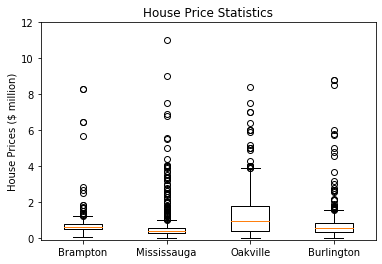

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('House Price Statistics')
ax1.set_ylabel('House Prices ($ million)')
ax1.set_ylim([-0.1,12])
plot_data = [brampton_df["Price ($)"]/1000000, mississauga_df["Price ($)"]/1000000, oakville_df["Price ($)"]/1000000, burlington_df["Price ($)"]/1000000]
ax1.boxplot(plot_data)
ax1.set_xticklabels(['Brampton', 'Mississauga', 'Oakville', 'Burlington'])
plt.show()

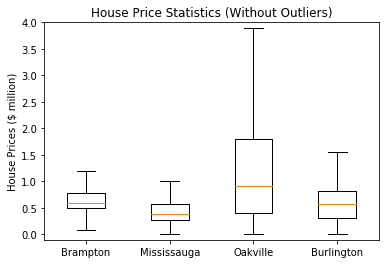

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('House Price Statistics (Without Outliers)')
ax1.set_ylabel('House Prices ($ million)')
ax1.set_ylim([-0.1,4])
plot_data = [brampton_df["Price ($)"]/1000000, mississauga_df["Price ($)"]/1000000, oakville_df["Price ($)"]/1000000, burlington_df["Price ($)"]/1000000]
ax1.boxplot(plot_data, showfliers=False)
ax1.set_xticklabels(['Brampton', 'Mississauga', 'Oakville', 'Burlington'])
plt.show()

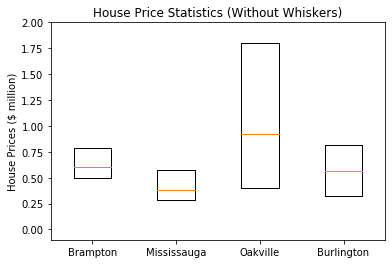

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('House Price Statistics (Without Whiskers)')
ax1.set_ylabel('House Prices ($ million)')
ax1.set_ylim([-0.1,2])
plot_data = [brampton_df["Price ($)"]/1000000, mississauga_df["Price ($)"]/1000000, oakville_df["Price ($)"]/1000000, burlington_df["Price ($)"]/1000000]
ax1.boxplot(plot_data, showfliers=False, whis=[25,75])
ax1.set_xticklabels(['Brampton', 'Mississauga', 'Oakville', 'Burlington'])
plt.show()

Box Plots - Outliers Removed

In [15]:
#BRAMPTON HOUSING DATA (without the outliers)
quartiles = bramptonpricelist.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#To Get the outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

nooutliers_brampton1 = brampton_df.loc[brampton_df["Price ($)"] >= lower_bound ]
nooutliers_brampton2 = nooutliers_brampton1.loc[nooutliers_brampton1["Price ($)"] <= upper_bound]


In [16]:
#MISSISSAUGA HOUSING DATA (without the outliers)
quartiles = mississaugapricelist.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
#To Get the outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

nooutliers_mississauga1 = mississauga_df.loc[mississauga_df["Price ($)"] >= lower_bound ]
nooutliers_mississauga2 = nooutliers_mississauga1.loc[nooutliers_mississauga1["Price ($)"] <= upper_bound]

In [17]:
#OAKVILLE HOUSING DATA (without the outliers)
quartiles = oakvillepricelist.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
#To Get the outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

nooutliers_oakville1 = oakville_df.loc[oakville_df["Price ($)"] >= lower_bound ]
nooutliers_oakville2  = nooutliers_oakville1.loc[nooutliers_oakville1["Price ($)"] <= upper_bound]

In [18]:
#BURLINGTON HOUSING DATA (without the outliers)
quartiles = burlingtonpricelist.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
#To Get the outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

nooutliers_burlington1 = burlington_df.loc[burlington_df["Price ($)"] >= lower_bound ]
nooutliers_burlington2  = nooutliers_burlington1.loc[nooutliers_burlington1["Price ($)"] <= upper_bound]


In [19]:
#Summary table with outliers excluded

bramp_describe_df = nooutliers_brampton2.groupby('AreaName')['Price ($)'].describe()

missi_describe_df = nooutliers_mississauga2.groupby('AreaName')['Price ($)'].describe()

oak_describe_df = nooutliers_oakville2.groupby('AreaName')['Price ($)'].describe()

burl_describe_df = nooutliers_burlington2.groupby('AreaName')['Price ($)'].describe()

outliers_removed=pd.concat([bramp_describe_df,missi_describe_df,oak_describe_df,burl_describe_df],ignore_index=False,sort=False)
outliers_removed

outliers_removed = outliers_removed.rename(columns ={'count':'House Count','mean':'House Mean','std':'House STD','min':'House Min','25%':'House 25%','50%':'House 50%','75%':'House 75%','max':'House Max'})
outliers_removed = round(outliers_removed,0)
outliers_removed
# outlier_columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
# for x in outlier_columns:
    
#     outliers_removed[x] = outliers_removed[x].map(lambda x: "{0:,.0f}".format(x))
    
    
# outliers_removed

,House Count,House Mean,House STD,House Min,House 25%,House 50%,House 75%,House Max
AreaName,,,,,,,,
Brampton,292.0,602555.0,216023.0,79913.0,489000.0,587950.0,742175.0,1200000.0
Mississauga,687.0,401925.0,206331.0,5.0,279000.0,359499.0,499894.0,1000000.0
Oakville,284.0,1095456.0,953658.0,0.0,364675.0,858900.0,1699000.0,3895000.0
Burlington,297.0,526537.0,350760.0,0.0,294000.0,529900.0,699900.0,1549000.0


In [20]:
#Difference in values with and without outliers

table_comparison = round(final_price_df.subtract(outliers_removed),0)
table_comparison = table_comparison.rename(columns ={'House Count':'House Count Difference','House Mean':'House Mean Difference','House STD':'House STD Difference','House Min':'House Min Difference','House 25%':'House 25% Difference','House 50%':'House 50% Difference','House 75%':'House 75% Difference','House Max':'House Max Difference'})
table_comparison

,House Count Difference,House Mean Difference,House STD Difference,House Min Difference,House 25% Difference,House 50% Difference,House 75% Difference,House Max Difference
City,,,,,,,,
Brampton,19.0,156389.0,667535.0,0.0,10000.0,11050.0,45608.0,7082590.0
Mississauga,65.0,212199.0,714826.0,0.0,3175.0,20401.0,71306.0,9995000.0
Oakville,22.0,304558.0,518326.0,0.0,35125.0,64950.0,100000.0,4503000.0
Burlington,34.0,286180.0,785794.0,0.0,25275.0,39100.0,112599.0,7251000.0


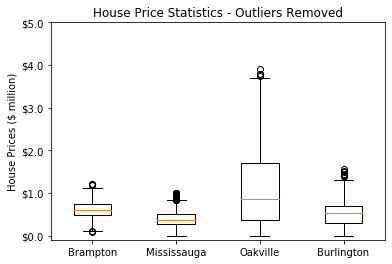

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('House Price Statistics - Outliers Removed')
ax1.set_ylabel('House Prices ($ million)')
ax1.set_ylim([-0.1,5])
formatter = ticker.FormatStrFormatter('$%1.1f')
ax1.yaxis.set_major_formatter(formatter)

plot_data = [nooutliers_brampton2["Price ($)"]/1000000, nooutliers_mississauga2["Price ($)"]/1000000, nooutliers_oakville2["Price ($)"]/1000000, nooutliers_burlington2["Price ($)"]/1000000]
ax1.boxplot(plot_data)
ax1.set_xticklabels(['Brampton', 'Mississauga', 'Oakville', 'Burlington'])
plt.show()

**School Scores**

Elementary Schools

In [22]:
#BRAMPTON - ELEMENTARY SCHOOLS

#Average Primary Brampton emementary school Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_Brampton_string_p1 =r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/503560" class="">Aylesbury Public School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-503560" id="compare-schools-503560" type="checkbox" class="compare-schools"><label for="compare-schools-503560" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/89058" class="">Beryl Ford</a></td><td class="school-rating text-xs-center score_color_4">7.9</td><td class="text-xs-center">346/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-89058" id="compare-schools-89058" type="checkbox" class="compare-schools"><label for="compare-schools-89058" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/689556" class="">Bishop Francis Allen Catholic School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-689556" id="compare-schools-689556" type="checkbox" class="compare-schools"><label for="compare-schools-689556" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/33387" class="">Castle Oaks Public School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-33387" id="compare-schools-33387" type="checkbox" class="compare-schools"><label for="compare-schools-33387" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/88340" class="">Castlemore Public School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-88340" id="compare-schools-88340" type="checkbox" class="compare-schools"><label for="compare-schools-88340" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/267840" class="">Churchville Public School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-267840" id="compare-schools-267840" type="checkbox" class="compare-schools"><label for="compare-schools-267840" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/35007" class="">Countryside Village PS (Elementary)</a></td><td class="school-rating text-xs-center score_color_2">5.6</td><td class="text-xs-center">1871/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-35007" id="compare-schools-35007" type="checkbox" class="compare-schools"><label for="compare-schools-35007" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/186040" class="">Dolson Public School</a></td><td class="school-rating text-xs-center score_color_3">6.0</td><td class="text-xs-center">1617/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-186040" id="compare-schools-186040" type="checkbox" class="compare-schools"><label for="compare-schools-186040" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/195640" class="">Eagle Plains Public School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-195640" id="compare-schools-195640" type="checkbox" class="compare-schools"><label for="compare-schools-195640" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/426375" class="">Eldorado P.S. (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-426375" id="compare-schools-426375" type="checkbox" class="compare-schools"><label for="compare-schools-426375" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/588552" class="">Fairlawn Elementary Public School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-588552" id="compare-schools-588552" type="checkbox" class="compare-schools"><label for="compare-schools-588552" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/696307" class="">Father C W Sullivan Catholic School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-696307" id="compare-schools-696307" type="checkbox" class="compare-schools"><label for="compare-schools-696307" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/706337" class="">Father Clair Tipping School</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">1338/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-706337" id="compare-schools-706337" type="checkbox" class="compare-schools"><label for="compare-schools-706337" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/730441" class="">Father Francis McSpiritt Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.6</td><td class="text-xs-center">1871/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-730441" id="compare-schools-730441" type="checkbox" class="compare-schools"><label for="compare-schools-730441" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/708038" class="">Georges Vanier Catholic School</a></td><td class="school-rating text-xs-center score_color_2">5.4</td><td class="text-xs-center">1991/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-708038" id="compare-schools-708038" type="checkbox" class="compare-schools"><label for="compare-schools-708038" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/708070" class="">Good Shepherd Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.3</td><td class="text-xs-center">1409/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-708070" id="compare-schools-708070" type="checkbox" class="compare-schools"><label for="compare-schools-708070" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/228940" class="">Great Lakes Public School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-228940" id="compare-schools-228940" type="checkbox" class="compare-schools"><label for="compare-schools-228940" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/708143" class="">Guardian Angels Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.3</td><td class="text-xs-center">2041/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-708143" id="compare-schools-708143" type="checkbox" class="compare-schools"><label for="compare-schools-708143" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/819219" class="">Holy Spirit Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-819219" id="compare-schools-819219" type="checkbox" class="compare-schools"><label for="compare-schools-819219" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/595134" class="">Ingleborough (Elementary)</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-595134" id="compare-schools-595134" type="checkbox" class="compare-schools"><label for="compare-schools-595134" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/587234" class="">James Grieve Public School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-587234" id="compare-schools-587234" type="checkbox" class="compare-schools"><label for="compare-schools-587234" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/726494" class="">Lester B Pearson Catholic School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-726494" id="compare-schools-726494" type="checkbox" class="compare-schools"><label for="compare-schools-726494" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/499344" class="">Lorenville P.S. (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">1277/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-499344" id="compare-schools-499344" type="checkbox" class="compare-schools"><label for="compare-schools-499344" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/444522" class="">McClure PS (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">6.8</td><td class="text-xs-center">1048/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-444522" id="compare-schools-444522" type="checkbox" class="compare-schools"><label for="compare-schools-444522" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/419607" class="">Mount Pleasant Village Public School</a></td><td class="school-rating text-xs-center score_color_2">4.8</td><td class="text-xs-center">2325/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-419607" id="compare-schools-419607" type="checkbox" class="compare-schools"><label for="compare-schools-419607" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/164342" class="">Mount Royal Public School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-164342" id="compare-schools-164342" type="checkbox" class="compare-schools"><label for="compare-schools-164342" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/372978" class="">Mountain Ash (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-372978" id="compare-schools-372978" type="checkbox" class="compare-schools"><label for="compare-schools-372978" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/742171" class="">Our Lady of Fatima School</a></td><td class="school-rating text-xs-center score_color_1">3.3</td><td class="text-xs-center">2794/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-742171" id="compare-schools-742171" type="checkbox" class="compare-schools"><label for="compare-schools-742171" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/782606" class="">Our Lady of Lourdes Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-782606" id="compare-schools-782606" type="checkbox" class="compare-schools"><label for="compare-schools-782606" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/749087" class="">Our Lady of Peace School</a></td><td class="school-rating text-xs-center score_color_2">5.7</td><td class="text-xs-center">1821/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-749087" id="compare-schools-749087" type="checkbox" class="compare-schools"><label for="compare-schools-749087" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/747882" class="">Our Lady of Providence Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.8</td><td class="text-xs-center">1756/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-747882" id="compare-schools-747882" type="checkbox" class="compare-schools"><label for="compare-schools-747882" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/750042" class="">Pauline Vanier Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_1">3.1</td><td class="text-xs-center">2831/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-750042" id="compare-schools-750042" type="checkbox" class="compare-schools"><label for="compare-schools-750042" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/147831" class="">Ray Lawson</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-147831" id="compare-schools-147831" type="checkbox" class="compare-schools"><label for="compare-schools-147831" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/487414" class="">Robert J Lee Public School</a></td><td class="school-rating text-xs-center score_color_3">6.0</td><td class="text-xs-center">1617/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-487414" id="compare-schools-487414" type="checkbox" class="compare-schools"><label for="compare-schools-487414" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/561022" class="">Roberta Bondar Public School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-561022" id="compare-schools-561022" type="checkbox" class="compare-schools"><label for="compare-schools-561022" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/493318" class="">Ross Drive P.S. (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">6.8</td><td class="text-xs-center">1048/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-493318" id="compare-schools-493318" type="checkbox" class="compare-schools"><label for="compare-schools-493318" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/867942" class="">Sacred Heart Separate School</a></td><td class="school-rating text-xs-center score_color_2">4.4</td><td class="text-xs-center">2493/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-867942" id="compare-schools-867942" type="checkbox" class="compare-schools"><label for="compare-schools-867942" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/156880" class="">Shaw Public School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-156880" id="compare-schools-156880" type="checkbox" class="compare-schools"><label for="compare-schools-156880" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/209969" class="">Sir Isaac Brock P.S. (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-209969" id="compare-schools-209969" type="checkbox" class="compare-schools"><label for="compare-schools-209969" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/516430" class="">Sir Winston Churchill Public School</a></td><td class="school-rating text-xs-center score_color_1">3.0</td><td class="text-xs-center">2842/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-516430" id="compare-schools-516430" type="checkbox" class="compare-schools"><label for="compare-schools-516430" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/626274" class="">Springbrook P.S. (Elementary)</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-626274" id="compare-schools-626274" type="checkbox" class="compare-schools"><label for="compare-schools-626274" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/770434" class="">St Agnes Separate School</a></td><td class="school-rating text-xs-center score_color_4">9.6</td><td class="text-xs-center">27/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-770434" id="compare-schools-770434" type="checkbox" class="compare-schools"><label for="compare-schools-770434" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/770620" class="">St Angela Merici Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">1338/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-770620" id="compare-schools-770620" type="checkbox" class="compare-schools"><label for="compare-schools-770620" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/771759" class="">St Anne Separate School</a></td><td class="school-rating text-xs-center score_color_2">5.9</td><td class="text-xs-center">1683/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-771759" id="compare-schools-771759" type="checkbox" class="compare-schools"><label for="compare-schools-771759" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/773530" class="">St Anthony School</a></td><td class="school-rating text-xs-center score_color_2">4.2</td><td class="text-xs-center">2578/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-773530" id="compare-schools-773530" type="checkbox" class="compare-schools"><label for="compare-schools-773530" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/780804" class="">St Brigid School</a></td><td class="school-rating text-xs-center score_color_2">5.7</td><td class="text-xs-center">1821/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-780804" id="compare-schools-780804" type="checkbox" class="compare-schools"><label for="compare-schools-780804" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/781819" class="">St Cecilia Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.5</td><td class="text-xs-center">1936/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-781819" id="compare-schools-781819" type="checkbox" class="compare-schools"><label for="compare-schools-781819" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/792586" class="">St Francis Xavier Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.5</td><td class="text-xs-center">1936/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-792586" id="compare-schools-792586" type="checkbox" class="compare-schools"><label for="compare-schools-792586" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/798274" class="">St Isaac Jogues Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.3</td><td class="text-xs-center">1409/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-798274" id="compare-schools-798274" type="checkbox" class="compare-schools"><label for="compare-schools-798274" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/800465" class="">St Jean Brebeuf Separate School</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">577/3037</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-800465" id="compare-schools-800465" type="checkbox" class="compare-schools"><label for="compare-schools-800465" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_Brampton_string_p1= pd.read_html(ahtml_Brampton_string_p1)
#Data Clean up and taking data from [0]
ahtml_Brampton_string_p1=ahtml_Brampton_string_p1[0]
ahtml_Brampton_string_p1.dtypes
ahtml_Brampton_string_p1=ahtml_Brampton_string_p1.dropna(how="all",axis=0)
ahtml_Brampton_string_p1=ahtml_Brampton_string_p1.dropna(how="all",axis=1)
ahtml_Brampton_string_p1["new_col"]=ahtml_Brampton_string_p1["Rank 2018 - 19keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_Brampton_string_p1["div_Rank"]=ahtml_Brampton_string_p1["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_Brampton_string_p1 = ahtml_Brampton_string_p1.rename(columns={"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2018 - 19keyboard_arrow_downhelp": "Scores",
                                                "Rank 2018 - 19keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })
html_Brampton_string_p1=ahtml_Brampton_string_p1.groupby("City")["Scores"].describe()
html_Brampton_string_p1=pd.DataFrame(html_Brampton_string_p1)
#Adding a School column and naming as Elementary
ElementarySchool = "Elementary"
html_Brampton_string_p1["School"]=ElementarySchool
html_Brampton_string_p1= html_Brampton_string_p1.reset_index()
#Output to CSV file at the Output Folder
html_Brampton_string_p1.to_csv("output/Brampton_Elementary_Scores.csv", index=True)
html_Brampton_string_p1



,City,count,mean,std,min,25%,50%,75%,max,School
0,Brampton,50.0,6.354,1.296968,3.0,5.7,6.45,7.2,9.6,Elementary


In [23]:
#MISSISSAUGA - ELEMENTARY SCHOOLS

#Average Primary Missi school Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_missi_string_p1 =r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/685461" class="">All Saints Catholic School</a></td><td class="school-rating text-xs-center score_color_2">5.2</td><td class="text-xs-center">2102/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-685461" id="compare-schools-685461" type="checkbox" class="compare-schools"><label for="compare-schools-685461" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/682438" class="">Bishop Scalabrini School</a></td><td class="school-rating text-xs-center score_color_3">7.1</td><td class="text-xs-center">824/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-682438" id="compare-schools-682438" type="checkbox" class="compare-schools"><label for="compare-schools-682438" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/693715" class="">Canadian Martyrs School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-693715" id="compare-schools-693715" type="checkbox" class="compare-schools"><label for="compare-schools-693715" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/97098" class="">Cashmere Avenue Public School</a></td><td class="school-rating text-xs-center score_color_2">4.3</td><td class="text-xs-center">2540/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-97098" id="compare-schools-97098" type="checkbox" class="compare-schools"><label for="compare-schools-97098" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/697095" class="">Christ The King Catholic School</a></td><td class="school-rating text-xs-center score_color_2">5.8</td><td class="text-xs-center">1756/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-697095" id="compare-schools-697095" type="checkbox" class="compare-schools"><label for="compare-schools-697095" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/701807" class="">Corpus Christi School</a></td><td class="school-rating text-xs-center score_color_2">5.9</td><td class="text-xs-center">1683/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-701807" id="compare-schools-701807" type="checkbox" class="compare-schools"><label for="compare-schools-701807" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/703222" class="">Divine Mercy School</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-703222" id="compare-schools-703222" type="checkbox" class="compare-schools"><label for="compare-schools-703222" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/173479" class="">Ellengale Public School</a></td><td class="school-rating text-xs-center score_color_4">7.9</td><td class="text-xs-center">346/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-173479" id="compare-schools-173479" type="checkbox" class="compare-schools"><label for="compare-schools-173479" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/276502" class="">Elm Drive (Elementary)</a></td><td class="school-rating text-xs-center score_color_2">5.1</td><td class="text-xs-center">2170/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-276502" id="compare-schools-276502" type="checkbox" class="compare-schools"><label for="compare-schools-276502" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/857238" class="">Father Daniel Zanon Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.8</td><td class="text-xs-center">1756/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-857238" id="compare-schools-857238" type="checkbox" class="compare-schools"><label for="compare-schools-857238" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/199362" class="">Floradale Public School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-199362" id="compare-schools-199362" type="checkbox" class="compare-schools"><label for="compare-schools-199362" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/201316" class="">Forest Avenue Public School</a></td><td class="school-rating text-xs-center score_color_2">5.9</td><td class="text-xs-center">1683/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-201316" id="compare-schools-201316" type="checkbox" class="compare-schools"><label for="compare-schools-201316" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/250716" class="">Hawthorn Public School</a></td><td class="school-rating text-xs-center score_color_4">8.4</td><td class="text-xs-center">169/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-250716" id="compare-schools-250716" type="checkbox" class="compare-schools"><label for="compare-schools-250716" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/259322" class="">Hillside Public School Public School</a></td><td class="school-rating text-xs-center score_color_2">4.1</td><td class="text-xs-center">2610/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-259322" id="compare-schools-259322" type="checkbox" class="compare-schools"><label for="compare-schools-259322" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/714909" class="">Holy Cross School</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">1338/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-714909" id="compare-schools-714909" type="checkbox" class="compare-schools"><label for="compare-schools-714909" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/289582" class="">Kenollie Public School</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-289582" id="compare-schools-289582" type="checkbox" class="compare-schools"><label for="compare-schools-289582" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/336467" class="">Maple Wood Public School</a></td><td class="school-rating text-xs-center score_color_1">2.6</td><td class="text-xs-center">2904/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-336467" id="compare-schools-336467" type="checkbox" class="compare-schools"><label for="compare-schools-336467" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/730742" class="">Mary Fix Catholic School</a></td><td class="school-rating text-xs-center score_color_2">5.1</td><td class="text-xs-center">2170/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-730742" id="compare-schools-730742" type="checkbox" class="compare-schools"><label for="compare-schools-730742" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/350192" class="">McBride Avenue Public School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-350192" id="compare-schools-350192" type="checkbox" class="compare-schools"><label for="compare-schools-350192" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/731447" class="">Metropolitan Andrei Catholic School</a></td><td class="school-rating text-xs-center score_color_2">5.1</td><td class="text-xs-center">2170/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-731447" id="compare-schools-731447" type="checkbox" class="compare-schools"><label for="compare-schools-731447" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/365246" class="">Miller's Grove School</a></td><td class="school-rating text-xs-center score_color_2">4.4</td><td class="text-xs-center">2493/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-365246" id="compare-schools-365246" type="checkbox" class="compare-schools"><label for="compare-schools-365246" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/366412" class="">Mineola Public School</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-366412" id="compare-schools-366412" type="checkbox" class="compare-schools"><label for="compare-schools-366412" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/742821" class="">Our Lady of Good Voyage Catholic School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-742821" id="compare-schools-742821" type="checkbox" class="compare-schools"><label for="compare-schools-742821" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/747440" class="">Our Lady of Mercy Elementary School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-747440" id="compare-schools-747440" type="checkbox" class="compare-schools"><label for="compare-schools-747440" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/449075" class="">Plowman's Park Public School</a></td><td class="school-rating text-xs-center score_color_1">4.0</td><td class="text-xs-center">2643/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-449075" id="compare-schools-449075" type="checkbox" class="compare-schools"><label for="compare-schools-449075" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/449032" class="">Plum Tree Park Public School</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-449032" id="compare-schools-449032" type="checkbox" class="compare-schools"><label for="compare-schools-449032" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/752029" class="">Queen of Heaven School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-752029" id="compare-schools-752029" type="checkbox" class="compare-schools"><label for="compare-schools-752029" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/466778" class="">Queenston Drive Public School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-466778" id="compare-schools-466778" type="checkbox" class="compare-schools"><label for="compare-schools-466778" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/486400" class="">Riverside Public School</a></td><td class="school-rating text-xs-center score_color_1">2.7</td><td class="text-xs-center">2892/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-486400" id="compare-schools-486400" type="checkbox" class="compare-schools"><label for="compare-schools-486400" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/759481" class="">San Lorenzo Ruiz Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">577/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-759481" id="compare-schools-759481" type="checkbox" class="compare-schools"><label for="compare-schools-759481" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/519588" class="">Settler's Green Public School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-519588" id="compare-schools-519588" type="checkbox" class="compare-schools"><label for="compare-schools-519588" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/509019" class="">Shelter Bay Public School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-509019" id="compare-schools-509019" type="checkbox" class="compare-schools"><label for="compare-schools-509019" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/528137" class="">Springfield Public School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-528137" id="compare-schools-528137" type="checkbox" class="compare-schools"><label for="compare-schools-528137" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/766364" class="">St Albert of Jerusalem Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">577/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-766364" id="compare-schools-766364" type="checkbox" class="compare-schools"><label for="compare-schools-766364" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/759562" class="">St Alfred School</a></td><td class="school-rating text-xs-center score_color_2">5.3</td><td class="text-xs-center">2041/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-759562" id="compare-schools-759562" type="checkbox" class="compare-schools"><label for="compare-schools-759562" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/776092" class="">St Basil School</a></td><td class="school-rating text-xs-center score_color_2">5.8</td><td class="text-xs-center">1756/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-776092" id="compare-schools-776092" type="checkbox" class="compare-schools"><label for="compare-schools-776092" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/777528" class="">St Bernadette Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-777528" id="compare-schools-777528" type="checkbox" class="compare-schools"><label for="compare-schools-777528" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/781401" class="">St Catherine of Siena School</a></td><td class="school-rating text-xs-center score_color_3">7.1</td><td class="text-xs-center">824/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-781401" id="compare-schools-781401" type="checkbox" class="compare-schools"><label for="compare-schools-781401" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/783870" class="">St Christopher School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-783870" id="compare-schools-783870" type="checkbox" class="compare-schools"><label for="compare-schools-783870" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/784290" class="">St Clare School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-784290" id="compare-schools-784290" type="checkbox" class="compare-schools"><label for="compare-schools-784290" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/785997" class="">St David of Wales Separate School</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">97/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-785997" id="compare-schools-785997" type="checkbox" class="compare-schools"><label for="compare-schools-785997" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/786730" class="">St Dominic Separate School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-786730" id="compare-schools-786730" type="checkbox" class="compare-schools"><label for="compare-schools-786730" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/690031" class="">St Edith Stein Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-690031" id="compare-schools-690031" type="checkbox" class="compare-schools"><label for="compare-schools-690031" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/787647" class="">St Edmund Separate School</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">97/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-787647" id="compare-schools-787647" type="checkbox" class="compare-schools"><label for="compare-schools-787647" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/789143" class="">St Elizabeth Seton School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-789143" id="compare-schools-789143" type="checkbox" class="compare-schools"><label for="compare-schools-789143" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/789763" class="">St Faustina Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">1338/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-789763" id="compare-schools-789763" type="checkbox" class="compare-schools"><label for="compare-schools-789763" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/792020" class="">St Francis of Assisi School</a></td><td class="school-rating text-xs-center score_color_3">6.3</td><td class="text-xs-center">1409/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-792020" id="compare-schools-792020" type="checkbox" class="compare-schools"><label for="compare-schools-792020" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/794791" class="">St Gerard Separate School</a></td><td class="school-rating text-xs-center score_color_2">5.0</td><td class="text-xs-center">2227/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-794791" id="compare-schools-794791" type="checkbox" class="compare-schools"><label for="compare-schools-794791" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/795852" class="">St Gregory School</a></td><td class="school-rating text-xs-center score_color_4">7.9</td><td class="text-xs-center">346/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-795852" id="compare-schools-795852" type="checkbox" class="compare-schools"><label for="compare-schools-795852" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/796468" class="">St Helen Separate School</a></td><td class="school-rating text-xs-center score_color_4">7.9</td><td class="text-xs-center">346/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-796468" id="compare-schools-796468" type="checkbox" class="compare-schools"><label for="compare-schools-796468" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_missi_string_p2=r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/797316" class="">St Herbert School</a></td><td class="school-rating text-xs-center score_color_2">5.5</td><td class="text-xs-center">1936/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-797316" id="compare-schools-797316" type="checkbox" class="compare-schools"><label for="compare-schools-797316" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/797278" class="">St Hilary Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-797278" id="compare-schools-797278" type="checkbox" class="compare-schools"><label for="compare-schools-797278" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/801100" class="">St Jerome Separate School</a></td><td class="school-rating text-xs-center score_color_3">7.1</td><td class="text-xs-center">824/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-801100" id="compare-schools-801100" type="checkbox" class="compare-schools"><label for="compare-schools-801100" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/801577" class="">St John of the Cross School</a></td><td class="school-rating text-xs-center score_color_4">9.5</td><td class="text-xs-center">30/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-801577" id="compare-schools-801577" type="checkbox" class="compare-schools"><label for="compare-schools-801577" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/811041" class="">St Joseph Separate School</a></td><td class="school-rating text-xs-center score_color_2">5.7</td><td class="text-xs-center">1821/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-811041" id="compare-schools-811041" type="checkbox" class="compare-schools"><label for="compare-schools-811041" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/816396" class="">St Jude School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-816396" id="compare-schools-816396" type="checkbox" class="compare-schools"><label for="compare-schools-816396" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/800007" class="">St Julia Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">1277/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-800007" id="compare-schools-800007" type="checkbox" class="compare-schools"><label for="compare-schools-800007" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/819883" class="">St Louis School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-819883" id="compare-schools-819883" type="checkbox" class="compare-schools"><label for="compare-schools-819883" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/819433" class="">St Luke Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.8</td><td class="text-xs-center">1048/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-819433" id="compare-schools-819433" type="checkbox" class="compare-schools"><label for="compare-schools-819433" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/750298" class="">St Margaret of Scotland School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-750298" id="compare-schools-750298" type="checkbox" class="compare-schools"><label for="compare-schools-750298" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/823090" class="">St Mark Separate School</a></td><td class="school-rating text-xs-center score_color_4">9.2</td><td class="text-xs-center">46/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-823090" id="compare-schools-823090" type="checkbox" class="compare-schools"><label for="compare-schools-823090" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/832308" class="">St Matthew Separate School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-832308" id="compare-schools-832308" type="checkbox" class="compare-schools"><label for="compare-schools-832308" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/845779" class="">St Philip Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-845779" id="compare-schools-845779" type="checkbox" class="compare-schools"><label for="compare-schools-845779" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/846473" class="">St Pio of Pietrelcina Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">1277/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-846473" id="compare-schools-846473" type="checkbox" class="compare-schools"><label for="compare-schools-846473" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/847933" class="">St Raphael School</a></td><td class="school-rating text-xs-center score_color_2">5.2</td><td class="text-xs-center">2102/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-847933" id="compare-schools-847933" type="checkbox" class="compare-schools"><label for="compare-schools-847933" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/848751" class="">St Raymond Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-848751" id="compare-schools-848751" type="checkbox" class="compare-schools"><label for="compare-schools-848751" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/848930" class="">St Richard School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-848930" id="compare-schools-848930" type="checkbox" class="compare-schools"><label for="compare-schools-848930" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/850071" class="">St Rose of Lima Separate School</a></td><td class="school-rating text-xs-center score_color_4">9.4</td><td class="text-xs-center">35/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-850071" id="compare-schools-850071" type="checkbox" class="compare-schools"><label for="compare-schools-850071" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/850217" class="">St Sebastian Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-850217" id="compare-schools-850217" type="checkbox" class="compare-schools"><label for="compare-schools-850217" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/850365" class="">St Simon Stock Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-850365" id="compare-schools-850365" type="checkbox" class="compare-schools"><label for="compare-schools-850365" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/850403" class="">St Sofia School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-850403" id="compare-schools-850403" type="checkbox" class="compare-schools"><label for="compare-schools-850403" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/851299" class="">St Teresa of Avila Separate School</a></td><td class="school-rating text-xs-center score_color_2">5.4</td><td class="text-xs-center">1991/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-851299" id="compare-schools-851299" type="checkbox" class="compare-schools"><label for="compare-schools-851299" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/852651" class="">St Therese of the Child Jesus (Elementary) Separate School</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-852651" id="compare-schools-852651" type="checkbox" class="compare-schools"><label for="compare-schools-852651" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/856207" class="">St Thomas More School</a></td><td class="school-rating text-xs-center score_color_4">8.3</td><td class="text-xs-center">203/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-856207" id="compare-schools-856207" type="checkbox" class="compare-schools"><label for="compare-schools-856207" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/856673" class="">St Timothy School</a></td><td class="school-rating text-xs-center score_color_4">7.9</td><td class="text-xs-center">346/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-856673" id="compare-schools-856673" type="checkbox" class="compare-schools"><label for="compare-schools-856673" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/858420" class="">St Valentine Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.8</td><td class="text-xs-center">1048/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-858420" id="compare-schools-858420" type="checkbox" class="compare-schools"><label for="compare-schools-858420" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/857165" class="">St Veronica Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-857165" id="compare-schools-857165" type="checkbox" class="compare-schools"><label for="compare-schools-857165" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/865362" class="">St Vincent de Paul Separate School</a></td><td class="school-rating text-xs-center score_color_2">5.4</td><td class="text-xs-center">1991/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-865362" id="compare-schools-865362" type="checkbox" class="compare-schools"><label for="compare-schools-865362" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/775797" class="">St. Barbara Elementary School</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-775797" id="compare-schools-775797" type="checkbox" class="compare-schools"><label for="compare-schools-775797" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/738857" class="">St. Bernard of Clairvaux Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-738857" id="compare-schools-738857" type="checkbox" class="compare-schools"><label for="compare-schools-738857" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/783161" class="">St. Charles Garnier School</a></td><td class="school-rating text-xs-center score_color_2">4.9</td><td class="text-xs-center">2277/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-783161" id="compare-schools-783161" type="checkbox" class="compare-schools"><label for="compare-schools-783161" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/706631" class="">St. James Catholic Global Learning Centr</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-706631" id="compare-schools-706631" type="checkbox" class="compare-schools"><label for="compare-schools-706631" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/724106" class="">St. John XXIII Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">9.2</td><td class="text-xs-center">46/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-724106" id="compare-schools-724106" type="checkbox" class="compare-schools"><label for="compare-schools-724106" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/733229" class="">St. Teresa of Calcutta Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-733229" id="compare-schools-733229" type="checkbox" class="compare-schools"><label for="compare-schools-733229" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/863785" class="">Sts Martha &amp; Mary Separate School</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">97/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-863785" id="compare-schools-863785" type="checkbox" class="compare-schools"><label for="compare-schools-863785" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/843466" class="">Sts. Peter &amp; Paul Catholic School</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-843466" id="compare-schools-843466" type="checkbox" class="compare-schools"><label for="compare-schools-843466" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/550620" class="">Tecumseh Public School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-550620" id="compare-schools-550620" type="checkbox" class="compare-schools"><label for="compare-schools-550620" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/165417" class="">École élémentaire Horizon Jeunesse</a></td><td class="school-rating text-xs-center score_color_4">9.4</td><td class="text-xs-center">35/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-165417" id="compare-schools-165417" type="checkbox" class="compare-schools"><label for="compare-schools-165417" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/539105" class="">École élémentaire Le Flambeau</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-539105" id="compare-schools-539105" type="checkbox" class="compare-schools"><label for="compare-schools-539105" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/789369" class="">ÉÉC Ange-Gabriel</a></td><td class="school-rating text-xs-center score_color_4">8.4</td><td class="text-xs-center">169/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-789369" id="compare-schools-789369" type="checkbox" class="compare-schools"><label for="compare-schools-789369" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/705330" class="">ÉÉC René-Lamoureux</a></td><td class="school-rating text-xs-center score_color_2">5.8</td><td class="text-xs-center">1756/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-705330" id="compare-schools-705330" type="checkbox" class="compare-schools"><label for="compare-schools-705330" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/800490" class="">ÉÉC Saint-Jean-Baptiste</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">630/3037</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-800490" id="compare-schools-800490" type="checkbox" class="compare-schools"><label for="compare-schools-800490" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_missi_string_p1= pd.read_html(ahtml_missi_string_p1)
#Data Clean up and taking data from [0]
ahtml_missi_string_p1=ahtml_missi_string_p1[0]
ahtml_missi_string_p2= pd.read_html(ahtml_missi_string_p2)
ahtml_missi_string_p2=ahtml_missi_string_p2[0]
#concat two pages from html
ahtml_missi_primary=pd.concat([ahtml_missi_string_p1,ahtml_missi_string_p2],ignore_index=True)
ahtml_missi_primary=ahtml_missi_primary.dropna(how="all",axis=0)
ahtml_missi_primary=ahtml_missi_primary.dropna(how="all",axis=1)
ahtml_missi_primary["new_col"]=ahtml_missi_primary["Rank 2018 - 19keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_missi_primary["div_Rank"]=ahtml_missi_primary["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_missi_primary = ahtml_missi_primary.rename(columns={"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2018 - 19keyboard_arrow_downhelp": "Scores",
                                                "Rank 2018 - 19keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })
html_missi_primary=ahtml_missi_primary.groupby("City")["Scores"].describe()
html_missi_primary=pd.DataFrame(html_missi_primary)
#Adding a School column and naming as Elementary
ElementarySchool = "Elementary"
html_missi_primary["School"]=ElementarySchool
html_missi_primary= html_missi_primary.reset_index()
#Output to CSV file at the Output Folder
html_missi_primary.to_csv("output/Missisauga_Elementary_Scores.csv", index=True)
html_missi_primary

,City,count,mean,std,min,25%,50%,75%,max,School
0,Mississauga,92.0,6.806522,1.376954,2.6,5.9,7.0,7.6,9.5,Elementary


In [24]:
#OAKVILLE - ELEMENTARY SCHOOLS

# Average Oakville Elementary School Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_oakville_elementary_string = r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/779" class="">Abbey Lane Public School</a></td><td class="school-rating text-xs-center score_color_2">5.3</td><td class="text-xs-center">2041/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-779" id="compare-schools-779" type="checkbox" class="compare-schools"><label for="compare-schools-779" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/66249" class="">Brookdale Public School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-66249" id="compare-schools-66249" type="checkbox" class="compare-schools"><label for="compare-schools-66249" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/85898" class="">Captain R. Wilson Public School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-85898" id="compare-schools-85898" type="checkbox" class="compare-schools"><label for="compare-schools-85898" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/156469" class="">E J James Public School</a></td><td class="school-rating text-xs-center score_color_4">8.9</td><td class="text-xs-center">83/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-156469" id="compare-schools-156469" type="checkbox" class="compare-schools"><label for="compare-schools-156469" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/164267" class="">Eastview Public School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-164267" id="compare-schools-164267" type="checkbox" class="compare-schools"><label for="compare-schools-164267" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/206470" class="">Emily Carr Public School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-206470" id="compare-schools-206470" type="checkbox" class="compare-schools"><label for="compare-schools-206470" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/193046" class="">Falgarwood Public School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-193046" id="compare-schools-193046" type="checkbox" class="compare-schools"><label for="compare-schools-193046" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/474578" class="">Forest Trail Public School (Elementary)</a></td><td class="school-rating text-xs-center score_color_4">9.0</td><td class="text-xs-center">70/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-474578" id="compare-schools-474578" type="checkbox" class="compare-schools"><label for="compare-schools-474578" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/216267" class="">Gladys Speers Public School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-216267" id="compare-schools-216267" type="checkbox" class="compare-schools"><label for="compare-schools-216267" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/253340" class="">Heritage Glen Public School</a></td><td class="school-rating text-xs-center score_color_4">8.2</td><td class="text-xs-center">228/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-253340" id="compare-schools-253340" type="checkbox" class="compare-schools"><label for="compare-schools-253340" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/716936" class="">Holy Family Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.0</td><td class="text-xs-center">1617/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-716936" id="compare-schools-716936" type="checkbox" class="compare-schools"><label for="compare-schools-716936" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/138990" class="">James W. Hill Public School</a></td><td class="school-rating text-xs-center score_color_4">8.7</td><td class="text-xs-center">118/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-138990" id="compare-schools-138990" type="checkbox" class="compare-schools"><label for="compare-schools-138990" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/408543" class="">Joshua Creek Public School</a></td><td class="school-rating text-xs-center score_color_4">9.1</td><td class="text-xs-center">60/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-408543" id="compare-schools-408543" type="checkbox" class="compare-schools"><label for="compare-schools-408543" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/334693" class="">Maple Grove Public School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-334693" id="compare-schools-334693" type="checkbox" class="compare-schools"><label for="compare-schools-334693" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/376086" class="">Montclair Public School</a></td><td class="school-rating text-xs-center score_color_1">3.7</td><td class="text-xs-center">2726/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-376086" id="compare-schools-376086" type="checkbox" class="compare-schools"><label for="compare-schools-376086" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/380199" class="">Munn's Public School</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">97/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-380199" id="compare-schools-380199" type="checkbox" class="compare-schools"><label for="compare-schools-380199" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/383570" class="">New Central Public School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-383570" id="compare-schools-383570" type="checkbox" class="compare-schools"><label for="compare-schools-383570" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/76727" class="">Oodenawi Public School</a></td><td class="school-rating text-xs-center score_color_4">8.2</td><td class="text-xs-center">228/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-76727" id="compare-schools-76727" type="checkbox" class="compare-schools"><label for="compare-schools-76727" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/749052" class="">Our Lady of Peace Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.3</td><td class="text-xs-center">1409/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-749052" id="compare-schools-749052" type="checkbox" class="compare-schools"><label for="compare-schools-749052" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/154705" class="">Palermo Public School</a></td><td class="school-rating text-xs-center score_color_3">6.8</td><td class="text-xs-center">1048/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-154705" id="compare-schools-154705" type="checkbox" class="compare-schools"><label for="compare-schools-154705" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/442011" class="">Pilgrim Wood Public School</a></td><td class="school-rating text-xs-center score_color_4">8.9</td><td class="text-xs-center">83/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-442011" id="compare-schools-442011" type="checkbox" class="compare-schools"><label for="compare-schools-442011" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/444022" class="">Pine Grove Public School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-444022" id="compare-schools-444022" type="checkbox" class="compare-schools"><label for="compare-schools-444022" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/451720" class="">Post's Corners Public School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-451720" id="compare-schools-451720" type="checkbox" class="compare-schools"><label for="compare-schools-451720" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/485438" class="">River Oaks Public School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-485438" id="compare-schools-485438" type="checkbox" class="compare-schools"><label for="compare-schools-485438" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/768936" class="">St. Andrew Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.3</td><td class="text-xs-center">203/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-768936" id="compare-schools-768936" type="checkbox" class="compare-schools"><label for="compare-schools-768936" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/777650" class="">St. Bernadette Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-777650" id="compare-schools-777650" type="checkbox" class="compare-schools"><label for="compare-schools-777650" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/786861" class="">St. Dominic Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-786861" id="compare-schools-786861" type="checkbox" class="compare-schools"><label for="compare-schools-786861" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/755052" class="">St. Gregory the Great Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">893/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-755052" id="compare-schools-755052" type="checkbox" class="compare-schools"><label for="compare-schools-755052" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/801283" class="">St. Joan of Arc Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.9</td><td class="text-xs-center">1683/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-801283" id="compare-schools-801283" type="checkbox" class="compare-schools"><label for="compare-schools-801283" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/680039" class="">St. John Paul II Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-680039" id="compare-schools-680039" type="checkbox" class="compare-schools"><label for="compare-schools-680039" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/820679" class="">St. Luke Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">9.2</td><td class="text-xs-center">46/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-820679" id="compare-schools-820679" type="checkbox" class="compare-schools"><label for="compare-schools-820679" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/821241" class="">St. Marguerite d'Youville Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-821241" id="compare-schools-821241" type="checkbox" class="compare-schools"><label for="compare-schools-821241" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/681423" class="">St. Mary Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-681423" id="compare-schools-681423" type="checkbox" class="compare-schools"><label for="compare-schools-681423" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/823180" class="">St. Matthew Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.6</td><td class="text-xs-center">131/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-823180" id="compare-schools-823180" type="checkbox" class="compare-schools"><label for="compare-schools-823180" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/834319" class="">St. Michael Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-834319" id="compare-schools-834319" type="checkbox" class="compare-schools"><label for="compare-schools-834319" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/798827" class="">St. Nicholas Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-798827" id="compare-schools-798827" type="checkbox" class="compare-schools"><label for="compare-schools-798827" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/729159" class="">St. Teresa of Calcutta Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.2</td><td class="text-xs-center">228/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-729159" id="compare-schools-729159" type="checkbox" class="compare-schools"><label for="compare-schools-729159" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/858889" class="">St. Vincent Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">978/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-858889" id="compare-schools-858889" type="checkbox" class="compare-schools"><label for="compare-schools-858889" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/543217" class="">Sunningdale Public School</a></td><td class="school-rating text-xs-center score_color_4">8.7</td><td class="text-xs-center">118/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-543217" id="compare-schools-543217" type="checkbox" class="compare-schools"><label for="compare-schools-543217" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/579742" class="">W H Morden Public School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-579742" id="compare-schools-579742" type="checkbox" class="compare-schools"><label for="compare-schools-579742" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/597260" class="">West Oak Public School</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">577/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-597260" id="compare-schools-597260" type="checkbox" class="compare-schools"><label for="compare-schools-597260" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/426502" class="">École élémentaire du Chêne</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-426502" id="compare-schools-426502" type="checkbox" class="compare-schools"><label for="compare-schools-426502" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/619655" class="">École élémentaire Patricia-Picknell</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-619655" id="compare-schools-619655" type="checkbox" class="compare-schools"><label for="compare-schools-619655" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/822000" class="">ÉÉC Sainte-Marie-Oakville</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-822000" id="compare-schools-822000" type="checkbox" class="compare-schools"><label for="compare-schools-822000" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_oakville_elementary_string = pd.read_html(ahtml_oakville_elementary_string)
#Data Clean up and taking data from [0]
ahtml_oakville_elementary_string = ahtml_oakville_elementary_string[0]
ahtml_oakville_elementary_string.dtypes
ahtml_oakville_elementary_string = ahtml_oakville_elementary_string.dropna(how="all",axis=0)
ahtml_oakville_elementary_string = ahtml_oakville_elementary_string.dropna(how="all",axis=1)
ahtml_oakville_elementary_string["new_col"] = ahtml_oakville_elementary_string["Rank 2018 - 19keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_oakville_elementary_string["div_Rank"] = ahtml_oakville_elementary_string["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_oakville_elementary_string = ahtml_oakville_elementary_string.rename(columns = {"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2018 - 19keyboard_arrow_downhelp": "Scores",
                                                "Rank 2018 - 19keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })

html_oakville_elementary_string = ahtml_oakville_elementary_string.groupby("City")["Scores"].describe()
#Adding a School column and naming as Elementary
Elementary = "Elementary"
html_oakville_elementary_string["School"] = Elementary
html_oakville_elementary_string= html_oakville_elementary_string.reset_index()
#Output to CSV file at the Output Folder
html_oakville_elementary_string.to_csv("output/Oakville_Elementary_Scores.csv", index=True)
html_oakville_elementary_string


,City,count,mean,std,min,25%,50%,75%,max,School
0,Oakville,44.0,7.522727,1.086891,3.7,6.975,7.65,8.2,9.2,Elementary


In [25]:
#BURLINGTON - ELEMENTARY SCHOOLS

# Burlington Average Elementary Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_burlington_elementary_string = r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2018 - 19</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/33680" class="">Alexander's Public School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-33680" id="compare-schools-33680" type="checkbox" class="compare-schools"><label for="compare-schools-33680" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/344051" class="">Alton Village Public School</a></td><td class="school-rating text-xs-center score_color_4">7.9</td><td class="text-xs-center">346/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-344051" id="compare-schools-344051" type="checkbox" class="compare-schools"><label for="compare-schools-344051" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/687286" class="">Ascension Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-687286" id="compare-schools-687286" type="checkbox" class="compare-schools"><label for="compare-schools-687286" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/59501" class="">Brant Hills Public School</a></td><td class="school-rating text-xs-center score_color_1">3.7</td><td class="text-xs-center">2726/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-59501" id="compare-schools-59501" type="checkbox" class="compare-schools"><label for="compare-schools-59501" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/58360" class="">Bruce T Lindley</a></td><td class="school-rating text-xs-center score_color_3">6.0</td><td class="text-xs-center">1617/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-58360" id="compare-schools-58360" type="checkbox" class="compare-schools"><label for="compare-schools-58360" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/411795" class="">C H Norton Public School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-411795" id="compare-schools-411795" type="checkbox" class="compare-schools"><label for="compare-schools-411795" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/693987" class="">Canadian Martyrs Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-693987" id="compare-schools-693987" type="checkbox" class="compare-schools"><label for="compare-schools-693987" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/94455" class="">Central Public School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-94455" id="compare-schools-94455" type="checkbox" class="compare-schools"><label for="compare-schools-94455" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/77046" class="">Charles R. Beaudoin Public School</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-77046" id="compare-schools-77046" type="checkbox" class="compare-schools"><label for="compare-schools-77046" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/111090" class="">Clarksdale Public School</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">1277/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-111090" id="compare-schools-111090" type="checkbox" class="compare-schools"><label for="compare-schools-111090" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/194263" class="">Florence Meares Public School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-194263" id="compare-schools-194263" type="checkbox" class="compare-schools"><label for="compare-schools-194263" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/206474" class="">Frontenac Public School</a></td><td class="school-rating text-xs-center score_color_3">6.3</td><td class="text-xs-center">1409/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-206474" id="compare-schools-206474" type="checkbox" class="compare-schools"><label for="compare-schools-206474" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/220426" class="">Glenview Public School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-220426" id="compare-schools-220426" type="checkbox" class="compare-schools"><label for="compare-schools-220426" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/718483" class="">Holy Rosary (Burlington) Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.3</td><td class="text-xs-center">2041/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-718483" id="compare-schools-718483" type="checkbox" class="compare-schools"><label for="compare-schools-718483" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/285161" class="">John T Tuck Public School</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">97/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-285161" id="compare-schools-285161" type="checkbox" class="compare-schools"><label for="compare-schools-285161" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/223746" class="">John William Boich Public School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-223746" id="compare-schools-223746" type="checkbox" class="compare-schools"><label for="compare-schools-223746" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/299855" class="">Kings Road Public School</a></td><td class="school-rating text-xs-center score_color_2">4.1</td><td class="text-xs-center">2610/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-299855" id="compare-schools-299855" type="checkbox" class="compare-schools"><label for="compare-schools-299855" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/304271" class="">Lakeshore Public School</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">1540/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-304271" id="compare-schools-304271" type="checkbox" class="compare-schools"><label for="compare-schools-304271" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/336122" class="">Maplehurst Public School</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">1277/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-336122" id="compare-schools-336122" type="checkbox" class="compare-schools"><label for="compare-schools-336122" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/368857" class="">Mohawk Gardens Public School</a></td><td class="school-rating text-xs-center score_color_2">4.4</td><td class="text-xs-center">2493/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-368857" id="compare-schools-368857" type="checkbox" class="compare-schools"><label for="compare-schools-368857" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/421472" class="">Orchard Park Public School</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">513/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-421472" id="compare-schools-421472" type="checkbox" class="compare-schools"><label for="compare-schools-421472" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/70734" class="">Paul A Fisher Public School</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-70734" id="compare-schools-70734" type="checkbox" class="compare-schools"><label for="compare-schools-70734" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/437565" class="">Pauline Johnson Public School</a></td><td class="school-rating text-xs-center score_color_2">4.2</td><td class="text-xs-center">2578/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-437565" id="compare-schools-437565" type="checkbox" class="compare-schools"><label for="compare-schools-437565" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/445193" class="">Pineland Public School</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">449/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-445193" id="compare-schools-445193" type="checkbox" class="compare-schools"><label for="compare-schools-445193" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/489395" class="">Rolling Meadows Public School</a></td><td class="school-rating text-xs-center score_color_3">6.7</td><td class="text-xs-center">1119/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-489395" id="compare-schools-489395" type="checkbox" class="compare-schools"><label for="compare-schools-489395" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/495263" class="">Ryerson Public School</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">688/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-495263" id="compare-schools-495263" type="checkbox" class="compare-schools"><label for="compare-schools-495263" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/758280" class="">Sacred Heart of Jesus Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">577/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-758280" id="compare-schools-758280" type="checkbox" class="compare-schools"><label for="compare-schools-758280" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/515353" class="">Sir Ernest Macmillan Public School</a></td><td class="school-rating text-xs-center score_color_3">6.0</td><td class="text-xs-center">1617/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-515353" id="compare-schools-515353" type="checkbox" class="compare-schools"><label for="compare-schools-515353" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/772647" class="">St. Anne Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.7</td><td class="text-xs-center">118/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-772647" id="compare-schools-772647" type="checkbox" class="compare-schools"><label for="compare-schools-772647" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/838178" class="">St. Christopher Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.0</td><td class="text-xs-center">301/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-838178" id="compare-schools-838178" type="checkbox" class="compare-schools"><label for="compare-schools-838178" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/789232" class="">St. Elizabeth Seton Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.8</td><td class="text-xs-center">1756/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-789232" id="compare-schools-789232" type="checkbox" class="compare-schools"><label for="compare-schools-789232" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/793884" class="">St. Gabriel Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">1338/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-793884" id="compare-schools-793884" type="checkbox" class="compare-schools"><label for="compare-schools-793884" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/804410" class="">St. John (Burlington) Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">1338/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-804410" id="compare-schools-804410" type="checkbox" class="compare-schools"><label for="compare-schools-804410" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/823058" class="">St. Mark Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.6</td><td class="text-xs-center">1871/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-823058" id="compare-schools-823058" type="checkbox" class="compare-schools"><label for="compare-schools-823058" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/839442" class="">St. Patrick Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_2">5.2</td><td class="text-xs-center">2102/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-839442" id="compare-schools-839442" type="checkbox" class="compare-schools"><label for="compare-schools-839442" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/840912" class="">St. Paul Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">1195/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-840912" id="compare-schools-840912" type="checkbox" class="compare-schools"><label for="compare-schools-840912" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/848484" class="">St. Raphael Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-848484" id="compare-schools-848484" type="checkbox" class="compare-schools"><label for="compare-schools-848484" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/856630" class="">St. Timothy Catholic Elementary School</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">392/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-856630" id="compare-schools-856630" type="checkbox" class="compare-schools"><label for="compare-schools-856630" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/550361" class="">Tecumseh Public School</a></td><td class="school-rating text-xs-center score_color_2">4.9</td><td class="text-xs-center">2277/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-550361" id="compare-schools-550361" type="checkbox" class="compare-schools"><label for="compare-schools-550361" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/557269" class="">Tom Thomson Public School</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">766/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-557269" id="compare-schools-557269" type="checkbox" class="compare-schools"><label for="compare-schools-557269" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/165425" class="">École élémentaire Renaissance</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">267/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-165425" id="compare-schools-165425" type="checkbox" class="compare-schools"><label for="compare-schools-165425" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/elementary/842524" class="">ÉÉC Saint-Philippe</a></td><td class="school-rating text-xs-center score_color_2">5.6</td><td class="text-xs-center">1871/3037</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-842524" id="compare-schools-842524" type="checkbox" class="compare-schools"><label for="compare-schools-842524" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_burlington_elementary_string = pd.read_html(ahtml_burlington_elementary_string)
#Data Clean up and taking data from [0]
ahtml_burlington_elementary_string = ahtml_burlington_elementary_string[0]
ahtml_burlington_elementary_string.dtypes
ahtml_burlington_elementary_string = ahtml_burlington_elementary_string.dropna(how="all",axis=0)
ahtml_burlington_elementary_string = ahtml_burlington_elementary_string.dropna(how="all",axis=1)
ahtml_burlington_elementary_string["new_col"] = ahtml_burlington_elementary_string["Rank 2018 - 19keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_burlington_elementary_string["div_Rank"] = ahtml_burlington_elementary_string["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_burlington_elementary_string = ahtml_burlington_elementary_string.rename(columns = {"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2018 - 19keyboard_arrow_downhelp": "Scores",
                                                "Rank 2018 - 19keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })

html_burlington_elementary_string = ahtml_burlington_elementary_string.groupby("City")["Scores"].describe()
#Adding a School column and naming as Elementary
Elementary = "Elementary"
html_burlington_elementary_string["School"] = Elementary
html_burlington_elementary_string= html_burlington_elementary_string.reset_index()
#Output to CSV file at the Output Folder
html_burlington_elementary_string.to_csv("output/Burlington_Elementary_Scores.csv", index=True)
html_burlington_elementary_string


,City,count,mean,std,min,25%,50%,75%,max,School
0,Burlington,42.0,6.678571,1.273278,3.7,6.0,6.7,7.7,8.8,Elementary


High Schools

In [26]:
#Average secondary Brampton school Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_Brampton_string_s1 =r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/895920" class="">Bramalea</a></td><td class="school-rating text-xs-center score_color_2">4.9</td><td class="text-xs-center">569/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-895920" id="compare-schools-895920" type="checkbox" class="compare-schools"><label for="compare-schools-895920" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/896055" class="">Brampton Centennial</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">248/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-896055" id="compare-schools-896055" type="checkbox" class="compare-schools"><label for="compare-schools-896055" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/918407" class="">Castlebrooke</a></td><td class="school-rating text-xs-center score_color_3">6.9</td><td class="text-xs-center">248/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-918407" id="compare-schools-918407" type="checkbox" class="compare-schools"><label for="compare-schools-918407" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/899828" class="">Central Peel</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">390/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-899828" id="compare-schools-899828" type="checkbox" class="compare-schools"><label for="compare-schools-899828" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/901342" class="">Chinguacousy</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">148/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-901342" id="compare-schools-901342" type="checkbox" class="compare-schools"><label for="compare-schools-901342" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/909673" class="">David Suzuki</a></td><td class="school-rating text-xs-center score_color_2">5.6</td><td class="text-xs-center">477/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-909673" id="compare-schools-909673" type="checkbox" class="compare-schools"><label for="compare-schools-909673" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/910058" class="">Fletcher's Meadow</a></td><td class="school-rating text-xs-center score_color_3">6.3</td><td class="text-xs-center">344/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-910058" id="compare-schools-910058" type="checkbox" class="compare-schools"><label for="compare-schools-910058" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/943916" class="">Harold M. Brathwaite</a></td><td class="school-rating text-xs-center score_color_3">7.4</td><td class="text-xs-center">148/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-943916" id="compare-schools-943916" type="checkbox" class="compare-schools"><label for="compare-schools-943916" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/916269" class="">Heart Lake</a></td><td class="school-rating text-xs-center score_color_2">4.8</td><td class="text-xs-center">580/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-916269" id="compare-schools-916269" type="checkbox" class="compare-schools"><label for="compare-schools-916269" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/935244" class="">Jean Augustine</a></td><td class="school-rating text-xs-center score_color_2">4.3</td><td class="text-xs-center">626/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-935244" id="compare-schools-935244" type="checkbox" class="compare-schools"><label for="compare-schools-935244" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/907642" class="">Jeunes sans frontières</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">49/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-907642" id="compare-schools-907642" type="checkbox" class="compare-schools"><label for="compare-schools-907642" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/930679" class="">Judith Nyman</a></td><td class="school-rating text-xs-center score_color_1">0.0</td><td class="text-xs-center">731/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-930679" id="compare-schools-930679" type="checkbox" class="compare-schools"><label for="compare-schools-930679" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/904203" class="">Louise Arbour</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">325/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-904203" id="compare-schools-904203" type="checkbox" class="compare-schools"><label for="compare-schools-904203" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/930660" class="">North Park</a></td><td class="school-rating text-xs-center score_color_4">7.8</td><td class="text-xs-center">84/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-930660" id="compare-schools-930660" type="checkbox" class="compare-schools"><label for="compare-schools-930660" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/939596" class="">Sandalwood Heights</a></td><td class="school-rating text-xs-center score_color_2">5.5</td><td class="text-xs-center">492/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-939596" id="compare-schools-939596" type="checkbox" class="compare-schools"><label for="compare-schools-939596" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/918440" class="">Turner Fenton</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">305/738</td><td>Brampton</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-918440" id="compare-schools-918440" type="checkbox" class="compare-schools"><label for="compare-schools-918440" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_Brampton_string_s1= pd.read_html(ahtml_Brampton_string_s1)
#Data Clean up and taking data from [0]
ahtml_Brampton_string_s1=ahtml_Brampton_string_s1[0]
ahtml_Brampton_string_s1.dtypes
ahtml_Brampton_string_s1=ahtml_Brampton_string_s1.dropna(how="all",axis=0)
ahtml_Brampton_string_s1=ahtml_Brampton_string_s1.dropna(how="all",axis=1)
ahtml_Brampton_string_s1["new_col"]=ahtml_Brampton_string_s1["Rank 2017 - 18keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_Brampton_string_s1["div_Rank"]=ahtml_Brampton_string_s1["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_Brampton_string_s1 = ahtml_Brampton_string_s1.rename(columns={"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2017 - 18keyboard_arrow_downhelp": "Scores",
                                                "Rank 2017 - 18keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })
html_Brampton_string_s1=ahtml_Brampton_string_s1.groupby("City")["Scores"].describe()
html_Brampton_string_s1=pd.DataFrame(html_Brampton_string_s1)
#Adding a School column and naming as Highschool
HighSchool = "Highschool"
html_Brampton_string_s1["School"]=HighSchool
html_Brampton_string_s1 = html_Brampton_string_s1.reset_index()
#Output to CSV file at the Output Folder
html_Brampton_string_s1.to_csv("output/Brampton_High_Scores.csv", index=True)
html_Brampton_string_s1

,City,count,mean,std,min,25%,50%,75%,max,School
0,Brampton,16.0,5.93125,1.924827,0.0,5.35,6.35,7.025,8.1,Highschool


In [27]:
#Average secondary Brampton school Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_missi_string_s1 =r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc active"><span>Rank 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/918830" class="">John Fraser</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">14/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-918830" id="compare-schools-918830" type="checkbox" class="compare-schools"><label for="compare-schools-918830" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/954403" class="">The Woodlands</a></td><td class="school-rating text-xs-center score_color_4">8.4</td><td class="text-xs-center">32/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-954403" id="compare-schools-954403" type="checkbox" class="compare-schools"><label for="compare-schools-954403" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/924008" class="">Lorne Park</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">117/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-924008" id="compare-schools-924008" type="checkbox" class="compare-schools"><label for="compare-schools-924008" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/935832" class="">Port Credit</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">117/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-935832" id="compare-schools-935832" type="checkbox" class="compare-schools"><label for="compare-schools-935832" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/913189" class="">Glenforest</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">133/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-913189" id="compare-schools-913189" type="checkbox" class="compare-schools"><label for="compare-schools-913189" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/925551" class="">Meadowvale</a></td><td class="school-rating text-xs-center score_color_3">7.5</td><td class="text-xs-center">133/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-925551" id="compare-schools-925551" type="checkbox" class="compare-schools"><label for="compare-schools-925551" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/962646" class="">Stephen Lewis</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">164/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-962646" id="compare-schools-962646" type="checkbox" class="compare-schools"><label for="compare-schools-962646" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/899003" class="">Cawthra Park</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">186/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-899003" id="compare-schools-899003" type="checkbox" class="compare-schools"><label for="compare-schools-899003" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/892203" class="">Applewood Heights</a></td><td class="school-rating text-xs-center score_color_3">7.1</td><td class="text-xs-center">204/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-892203" id="compare-schools-892203" type="checkbox" class="compare-schools"><label for="compare-schools-892203" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/938009" class="">Rick Hansen</a></td><td class="school-rating text-xs-center score_color_3">7.1</td><td class="text-xs-center">204/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-938009" id="compare-schools-938009" type="checkbox" class="compare-schools"><label for="compare-schools-938009" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/945978" class="">Streetsville</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">225/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-945978" id="compare-schools-945978" type="checkbox" class="compare-schools"><label for="compare-schools-945978" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/925535" class="">Mississauga</a></td><td class="school-rating text-xs-center score_color_3">6.6</td><td class="text-xs-center">286/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-925535" id="compare-schools-925535" type="checkbox" class="compare-schools"><label for="compare-schools-925535" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/909092" class="">Erindale</a></td><td class="school-rating text-xs-center score_color_3">6.4</td><td class="text-xs-center">325/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-909092" id="compare-schools-909092" type="checkbox" class="compare-schools"><label for="compare-schools-909092" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/901660" class="">Clarkson</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">390/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-901660" id="compare-schools-901660" type="checkbox" class="compare-schools"><label for="compare-schools-901660" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/913863" class="">Gordon Graydon</a></td><td class="school-rating text-xs-center score_color_3">6.1</td><td class="text-xs-center">390/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-913863" id="compare-schools-913863" type="checkbox" class="compare-schools"><label for="compare-schools-913863" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/952885" class="">Lincoln M Alexander</a></td><td class="school-rating text-xs-center score_color_2">5.3</td><td class="text-xs-center">516/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-952885" id="compare-schools-952885" type="checkbox" class="compare-schools"><label for="compare-schools-952885" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/948187" class="">Thomas L Kennedy</a></td><td class="school-rating text-xs-center score_color_1">3.4</td><td class="text-xs-center">678/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-948187" id="compare-schools-948187" type="checkbox" class="compare-schools"><label for="compare-schools-948187" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/951404" class="">West Credit</a></td><td class="school-rating text-xs-center score_color_1">0.0</td><td class="text-xs-center">731/738</td><td>Mississauga</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-951404" id="compare-schools-951404" type="checkbox" class="compare-schools"><label for="compare-schools-951404" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_missi_string_s1= pd.read_html(ahtml_missi_string_s1)
#Data Clean up and taking data from [0]
ahtml_missi_string_s1=ahtml_missi_string_s1[0]
ahtml_missi_string_s1.dtypes
ahtml_missi_string_s1=ahtml_missi_string_s1.dropna(how="all",axis=0)
ahtml_missi_string_s1=ahtml_missi_string_s1.dropna(how="all",axis=1)
ahtml_missi_string_s1["new_col"]=ahtml_missi_string_s1["Rank 2017 - 18keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_missi_string_s1["div_Rank"]=ahtml_missi_string_s1["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_missi_string_s1 = ahtml_missi_string_s1.rename(columns={"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2017 - 18keyboard_arrow_downhelp": "Scores",
                                                "Rank 2017 - 18keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })
html_missi_string_s1=ahtml_missi_string_s1.groupby("City")["Scores"].describe()
html_missi_string_s1
#Adding a School column and naming as Highschool
HighSchool = "Highschool"
html_missi_string_s1["School"]=HighSchool
html_missi_string_s1
html_missi_string_s1 = html_missi_string_s1.reset_index()
#Output to CSV file at the Output Folder
html_missi_string_s1.to_csv("output/Missisauga_High_Scores.csv", index=True)
html_missi_string_s1

,City,count,mean,std,min,25%,50%,75%,max,School
0,Mississauga,18.0,6.5,2.015528,0.0,6.175,7.1,7.5,8.8,Highschool


In [28]:
# Oakville Average Highschool Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_oakville_high_string = r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/913715" class="">Abbey Park</a></td><td class="school-rating text-xs-center score_color_4">8.1</td><td class="text-xs-center">49/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-913715" id="compare-schools-913715" type="checkbox" class="compare-schools"><label for="compare-schools-913715" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/901439" class="">Garth Webb</a></td><td class="school-rating text-xs-center score_color_4">8.6</td><td class="text-xs-center">24/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-901439" id="compare-schools-901439" type="checkbox" class="compare-schools"><label for="compare-schools-901439" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/914723" class="">Gaétan Gervais</a></td><td class="school-rating text-xs-center score_color_4">7.6</td><td class="text-xs-center">117/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-914723" id="compare-schools-914723" type="checkbox" class="compare-schools"><label for="compare-schools-914723" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/918300" class="">Iroquois Ridge</a></td><td class="school-rating text-xs-center score_color_4">8.8</td><td class="text-xs-center">14/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-918300" id="compare-schools-918300" type="checkbox" class="compare-schools"><label for="compare-schools-918300" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/932060" class="">Oakville Trafalgar</a></td><td class="school-rating text-xs-center score_color_4">9.2</td><td class="text-xs-center">7/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-932060" id="compare-schools-932060" type="checkbox" class="compare-schools"><label for="compare-schools-932060" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/947539" class="">Thomas A Blakelock</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">101/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-947539" id="compare-schools-947539" type="checkbox" class="compare-schools"><label for="compare-schools-947539" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/953121" class="">White Oaks</a></td><td class="school-rating text-xs-center score_color_4">8.4</td><td class="text-xs-center">32/738</td><td>Oakville</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-953121" id="compare-schools-953121" type="checkbox" class="compare-schools"><label for="compare-schools-953121" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_oakville_high_string = pd.read_html(ahtml_oakville_high_string)
#Data Clean up and taking data from [0]
ahtml_oakville_high_string  = ahtml_oakville_high_string [0]
ahtml_oakville_high_string.dtypes
ahtml_oakville_high_string = ahtml_oakville_high_string.dropna(how="all",axis=0)
ahtml_oakville_high_string = ahtml_oakville_high_string.dropna(how="all",axis=1)
ahtml_oakville_high_string["new_col"] = ahtml_oakville_high_string["Rank 2017 - 18keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_oakville_high_string["div_Rank"] = ahtml_oakville_high_string["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_oakville_high_string = ahtml_oakville_high_string.rename(columns = {"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2017 - 18keyboard_arrow_downhelp": "Scores",
                                                "Rank 2017 - 18keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })
html_oakville_high_string = ahtml_oakville_high_string.groupby("City")["Scores"].describe()
#Adding a School column and naming as Highschool
Highschool = "Highschool"
html_oakville_high_string["School"] = Highschool
html_oakville_high_string= html_oakville_high_string.reset_index()
#Output to CSV file at the Output Folder
html_oakville_high_string.to_csv("output/Oakville_High_Scores.csv", index=True)
html_oakville_high_string

,City,count,mean,std,min,25%,50%,75%,max,School
0,Oakville,7.0,8.342857,0.582687,7.6,7.9,8.4,8.7,9.2,Highschool


In [29]:
# Burlington Highschool Ranks and Scores
# table_class  taken from https://www.compareschoolrankings.org/
ahtml_burlington_high_string = r'''<table class="v-datatable v-table theme--light"><thead><tr><th class="column sortable asc active text-xs-left header-school-name"><span>School Name</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc"><span>Score 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th><th class="column sortable asc"><span>Rank 2017 - 18</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class="column sortable asc text-xs-left"><span>City</span><i aria-hidden="true" class="v-icon material-icons theme--light" style="font-size: 16px;">keyboard_arrow_down</i><!----></th><th class=""><span>Add to compare</span><!----></th><th class="notify-me"><span>Notify me</span><i aria-hidden="true" class="v-icon tooltip-icon material-icons theme--light">help</i><span class="v-tooltip v-tooltip--top"></span></th></tr><tr class="v-datatable__progress"><th colspan="6" class="column"></th></tr></thead><tbody><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/890987" class="">Aldershot</a></td><td class="school-rating text-xs-center score_color_3">7.2</td><td class="text-xs-center">186/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-890987" id="compare-schools-890987" type="checkbox" class="compare-schools"><label for="compare-schools-890987" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/897353" class="">Burlington Central</a></td><td class="school-rating text-xs-center score_color_3">7.0</td><td class="text-xs-center">225/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-897353" id="compare-schools-897353" type="checkbox" class="compare-schools"><label for="compare-schools-897353" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/893675" class="">Dr. Frank J. Hayden</a></td><td class="school-rating text-xs-center score_color_3">7.3</td><td class="text-xs-center">164/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-893675" id="compare-schools-893675" type="checkbox" class="compare-schools"><label for="compare-schools-893675" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/922501" class="">Lester B Pearson</a></td><td class="school-rating text-xs-center score_color_3">7.1</td><td class="text-xs-center">204/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-922501" id="compare-schools-922501" type="checkbox" class="compare-schools"><label for="compare-schools-922501" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/924393" class="">M M Robinson</a></td><td class="school-rating text-xs-center score_color_3">6.5</td><td class="text-xs-center">305/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-924393" id="compare-schools-924393" type="checkbox" class="compare-schools"><label for="compare-schools-924393" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/928160" class="">Nelson</a></td><td class="school-rating text-xs-center score_color_4">7.7</td><td class="text-xs-center">101/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-928160" id="compare-schools-928160" type="checkbox" class="compare-schools"><label for="compare-schools-928160" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr><tr><td class="school-name text-xs-left"><a href="/school/on/secondary/937665" class="">Robert Bateman</a></td><td class="school-rating text-xs-center score_color_3">6.2</td><td class="text-xs-center">373/738</td><td>Burlington</td><td class="school-compare text-xs-center"><div class="flex checkbox-wrappper"><input name="compare-schools-937665" id="compare-schools-937665" type="checkbox" class="compare-schools"><label for="compare-schools-937665" class="compare-schools-label"></label></div></td><td class="text-xs-center"><button type="button" class="email-me v-btn theme--light"><div class="v-btn__content"></div></button></td></tr></tbody></table>'''
ahtml_burlington_high_string = pd.read_html(ahtml_burlington_high_string)
#Data Clean up and taking data from [0]
ahtml_burlington_high_string = ahtml_burlington_high_string [0]
ahtml_burlington_high_string.dtypes
ahtml_burlington_high_string = ahtml_burlington_high_string.dropna(how="all",axis=0)
ahtml_burlington_high_string = ahtml_burlington_high_string.dropna(how="all",axis=1)
ahtml_burlington_high_string["new_col"] = ahtml_burlington_high_string["Rank 2017 - 18keyboard_arrow_down"].map(lambda x: x.split("/"))
ahtml_burlington_high_string["div_Rank"] = ahtml_burlington_high_string["new_col"].map(lambda x: int(x[0])/int(x[1]))
ahtml_burlington_high_string = ahtml_burlington_high_string.rename(columns = {"School Namekeyboard_arrow_down": "School Name",
                                               "Score 2017 - 18keyboard_arrow_downhelp": "Scores",
                                                "Rank 2017 - 18keyboard_arrow_down": "Rank",
                                               "Citykeyboard_arrow_down": "City","div_Rank":"Divided Rank"
                                               })

html_burlington_high_string = ahtml_burlington_high_string.groupby("City")["Scores"].describe()
#Adding a School column and naming as Elementary
html_burlington_high_string["School"] = Highschool
html_burlington_high_string= html_burlington_high_string.reset_index()
#Output to CSV file at the Output Folder
html_burlington_high_string.to_csv("output/Burlington_High_Scores.csv", index=True)
html_burlington_high_string



,City,count,mean,std,min,25%,50%,75%,max,School
0,Burlington,7.0,7.0,0.503322,6.2,6.75,7.1,7.25,7.7,Highschool


In [30]:
#concat all the city with all the schools and created output to CSV
All_School=pd.concat([html_missi_string_s1,html_Brampton_string_s1,html_Brampton_string_p1,html_missi_primary,html_oakville_elementary_string,html_oakville_high_string,html_burlington_elementary_string,html_burlington_high_string],ignore_index=True,sort=False)
All_School.to_csv("output/All_City_School.csv", index=True)
rounded_All_School =All_School.round(2)
rounded_All_School

,City,count,mean,std,min,25%,50%,75%,max,School
0,Mississauga,18.0,6.50,2.02,0.0,6.17,7.10,7.50,8.8,Highschool
1,Brampton,16.0,5.93,1.92,0.0,5.35,6.35,7.02,8.1,Highschool
2,Brampton,50.0,6.35,1.30,3.0,5.70,6.45,7.20,9.6,Elementary
3,Mississauga,92.0,6.81,1.38,2.6,5.90,7.00,7.60,9.5,Elementary
4,Oakville,44.0,7.52,1.09,3.7,6.98,7.65,8.20,9.2,Elementary
5,Oakville,7.0,8.34,0.58,7.6,7.90,8.40,8.70,9.2,Highschool
6,Burlington,42.0,6.68,1.27,3.7,6.00,6.70,7.70,8.8,Elementary
7,Burlington,7.0,7.00,0.50,6.2,6.75,7.10,7.25,7.7,Highschool


Elementary School Summary

In [31]:
#concat all the city with all the schools and created output to CSV
Elementary_School=pd.concat([html_Brampton_string_p1,html_missi_primary,html_oakville_elementary_string,html_burlington_elementary_string],ignore_index=True,sort=False)
Elementary_School.to_csv("output/All_City__Elementary_School.csv", index=True)
Elementary_School


,City,count,mean,std,min,25%,50%,75%,max,School
0,Brampton,50.0,6.354000,1.296968,3.0,5.700,6.45,7.2,9.6,Elementary
1,Mississauga,92.0,6.806522,1.376954,2.6,5.900,7.00,7.6,9.5,Elementary
2,Oakville,44.0,7.522727,1.086891,3.7,6.975,7.65,8.2,9.2,Elementary
3,Burlington,42.0,6.678571,1.273278,3.7,6.000,6.70,7.7,8.8,Elementary


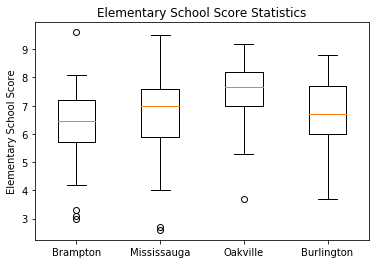

In [32]:
fig4, ax4 = plt.subplots()
ax4.set_title('Elementary School Score Statistics')
ax4.set_ylabel('Elementary School Score')
#ax1.set_ylim([-100000,12000000])
plot_data = [ahtml_Brampton_string_p1["Scores"],ahtml_missi_primary["Scores"],ahtml_oakville_elementary_string["Scores"],ahtml_burlington_elementary_string["Scores"]]
ax4.boxplot(plot_data)
ax4.set_xticklabels(['Brampton', 'Mississauga', 'Oakville', 'Burlington'])
plt.savefig("Elementary School Stats.png")
plt.show()



High School Summary

In [33]:
#concat all the city with all the schools and created output to CSV
High_School=pd.concat([html_Brampton_string_s1,html_missi_string_s1,html_oakville_high_string,html_burlington_high_string],ignore_index=True,sort=False)
High_School.to_csv("output/All_City_High_School.csv", index=True)
High_School

,City,count,mean,std,min,25%,50%,75%,max,School
0,Brampton,16.0,5.931250,1.924827,0.0,5.350,6.35,7.025,8.1,Highschool
1,Mississauga,18.0,6.500000,2.015528,0.0,6.175,7.10,7.500,8.8,Highschool
2,Oakville,7.0,8.342857,0.582687,7.6,7.900,8.40,8.700,9.2,Highschool
3,Burlington,7.0,7.000000,0.503322,6.2,6.750,7.10,7.250,7.7,Highschool


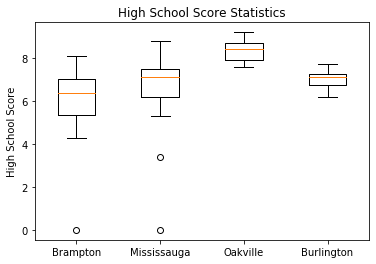

In [37]:
fig5, ax5 = plt.subplots()
ax5.set_title('High School Score Statistics')
ax5.set_ylabel('High School Score')
#ax1.set_ylim([-100000,12000000])
plot_data = [ahtml_Brampton_string_s1["Scores"],ahtml_missi_string_s1["Scores"],ahtml_oakville_high_string["Scores"],ahtml_burlington_high_string["Scores"]]
ax5.boxplot(plot_data)
ax5.set_xticklabels(['Brampton', 'Mississauga', 'Oakville', 'Burlington'])
plt.savefig("High School Stats.png")
plt.show()


**Commute Times**

In [38]:
#DATA IMPORT

#Reading the file from csv into pandas Dataframe
commute_times = pd.read_csv('GO_Train_Commute.csv')
commute_times


#commute_df1 = commute_df1.groupby("City")["Time to Union Stn (min)"].describe()

,Station Name,City,GO Line,Lat,Long,Time to Union Stn (min)
0,Aldershot GO,Burlington,LSW,43.3133,-79.8556,68
1,Burlington GO,Burlington,LSW,43.3404,-79.8098,62
2,Appleby GO,Burlington,LSW,43.3790,-79.7610,55
3,Bronte GO,Oakville,LSW,43.4172,-79.7223,48
4,Oakville GO,Oakville,LSW,43.4555,-79.6835,42
5,Clarkson,Mississauga,LSW,43.5125,-79.6343,34
6,Port Credit,Mississauga,LSW,43.5560,-79.5869,28
7,Lisgar GO,Mississauga,Milton,43.5908,-79.7885,54
8,Meadowvale GO,Mississauga,Milton,43.5976,-79.7543,49
9,Streetsville GO,Mississauga,Milton,43.5760,-79.7086,42


In [39]:
#Average commute time for each city to Union Station in Downtown Toronto
commute_travel_df = commute_times.groupby("City")["Time to Union Stn (min)"].describe()
commute_travel_df =commute_travel_df.drop(['std', '25%', '50%', '75%'], axis=1)
commute_travel_df.rename(columns = {'count':'# of Stations','mean':'Average Time (min)', 'min':'Minimum Time (min)', 'max':'Maximum Time (min)'}, inplace = True) 
rounded_commute_travel_df = commute_travel_df.round(1)
rounded_commute_travel_df


,# of Stations,Average Time (min),Minimum Time (min),Maximum Time (min)
City,,,,
Brampton,3.0,44.0,36.0,52.0
Burlington,3.0,61.7,55.0,68.0
Mississauga,8.0,37.5,25.0,54.0
Oakville,2.0,45.0,42.0,48.0


In [40]:
#Averages of Lat and Long to determine center of all station in each city
commute_coordinates_df = commute_times.groupby('City').mean()
commute_coordinates_df =commute_coordinates_df.drop(['Time to Union Stn (min)'], axis=1)
commute_coordinates_df

,Lat,Long
City,,
Brampton,43.688133,-79.759033
Burlington,43.344233,-79.808800
Mississauga,43.573925,-79.667638
Oakville,43.436350,-79.702900


In [41]:
commute_df = pd.merge(rounded_commute_travel_df, commute_coordinates_df, how='outer', on='City')
commute_df

,# of Stations,Average Time (min),Minimum Time (min),Maximum Time (min),Lat,Long
City,,,,,,
Brampton,3.0,44.0,36.0,52.0,43.688133,-79.759033
Burlington,3.0,61.7,55.0,68.0,43.344233,-79.808800
Mississauga,8.0,37.5,25.0,54.0,43.573925,-79.667638
Oakville,2.0,45.0,42.0,48.0,43.436350,-79.702900


In [42]:
# #DATA IMPORT

# #Reading the file from csv into pandas Dataframe
# commute_times = pd.read_csv('GO_Station_Commute_Times(2)')
# commute_df = commute_times
# commute_df


**Combined Price, Elementary and High School Scores and Commute Times by City**

In [43]:
schools_df=pd.merge(Elementary_School, High_School,how='outer', on='City', suffixes=('_elem', '_high') )
schools_df

price_schools_df = pd.merge(final_price_df, schools_df, how='outer', on='City')
price_schools_df

price_schools_commute_df = pd.merge(price_schools_df, commute_df, how='outer', on='City')

all_schools_weighted_avg = ((Elementary_School['mean']*Elementary_School['count'])+(High_School['mean']*High_School['count']))/(Elementary_School['count']+High_School['count'])
all_schools_weighted_avg

all_schools_count = (Elementary_School['count']+High_School['count'])
all_schools_count
price_schools_commute_df['Count All Schools'] = all_schools_count
price_schools_commute_df['Weighted Mean All Schools'] = all_schools_weighted_avg

price_schools_commute_df.to_csv("output/price_schools_commute.csv", index=True)
price_schools_commute_df


,City,House Count,House Mean,House STD,House Min,House 25%,House 50%,House 75%,House Max,count_elem,...,max_high,School_high,# of Stations,Average Time (min),Minimum Time (min),Maximum Time (min),Lat,Long,Count All Schools,Weighted Mean All Schools
0,Brampton,311,758944,883558,79913,499000,599000,787783,8282590,50.0,...,8.1,Highschool,3.0,44.0,36.0,52.0,43.688133,-79.759033,66.0,6.251515
1,Mississauga,752,614124,921157,5,282175,379900,571200,10995000,92.0,...,8.8,Highschool,8.0,37.5,25.0,54.0,43.573925,-79.667638,110.0,6.756364
2,Oakville,306,1400014,1471984,0,399800,923850,1799000,8398000,44.0,...,9.2,Highschool,2.0,45.0,42.0,48.0,43.436350,-79.702900,51.0,7.635294
3,Burlington,331,812717,1136554,0,319275,569000,812499,8800000,42.0,...,7.7,Highschool,3.0,61.7,55.0,68.0,43.344233,-79.808800,49.0,6.724490


**Combined Price, High School Score and Commute Times by City**

In [44]:
# price_secondary_df = pd.merge(final_price_df, High_School, how='outer', on='City', suffixes=('_price', '_score'))
# price_secondary_df

# price_secondary_commute_df = pd.merge(price_secondary_df, commute_df, how='outer', on='City')
# price_secondary_commute_df

In [45]:
new_summary_df = price_schools_commute_df[['City','House Count', 'House Mean','count_elem', 'mean_elem','count_high', 'mean_high', '# of Stations', 'Average Time (min)' ]]
renamed_new_summary_df = new_summary_df.rename(columns ={'House Mean':'Average House Price ($)','count_elem':'Elementary School Count','mean_elem':'Elementary School Avg Score','count_high':'High School Count','mean_high':'High School Avg Score'})
renamed_new_summary_df

format_mapping={'Average House Price ($)': '${:,.0f}', 'Elementary School Count': '{:,.0f}', 'Elementary School Avg Score': '{:.2f}', 'High School Count': '{:,.0f}', 'High School Avg Score': '{:.2f}','# of Stations': '{:.0f}', 'Average Time (min)': '{:.0f}'}

for key, value in format_mapping.items():
    renamed_new_summary_df[key] = renamed_new_summary_df[key].apply(value.format)
    
renamed_new_summary_df

,City,House Count,Average House Price ($),Elementary School Count,Elementary School Avg Score,High School Count,High School Avg Score,# of Stations,Average Time (min)
0,Brampton,311,"$758,944",50,6.35,16,5.93,3,44
1,Mississauga,752,"$614,124",92,6.81,18,6.50,8,38
2,Oakville,306,"$1,400,014",44,7.52,7,8.34,2,45
3,Burlington,331,"$812,717",42,6.68,7,7.00,3,62


The r-squared is: 0.8470364767885622


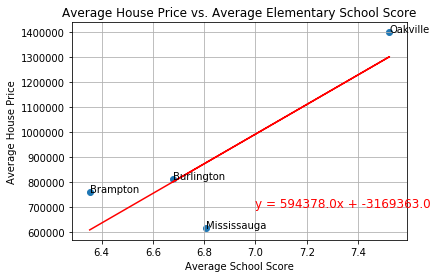

In [46]:
#Elementary School - House Price vs. School Score

# Add the linear regression equation and line to plot
elementary_school_score = price_schools_commute_df['mean_elem']
house_price = price_schools_commute_df['House Mean']

#add regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(elementary_school_score, house_price)
regress_values = elementary_school_score * slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,0))

#plot data as scatter
plt.scatter(elementary_school_score, house_price)

#plot regression line with formula
plt.plot(elementary_school_score,regress_values,"r-")
plt.annotate(line_eq,(7,700000),fontsize=12,color="red")

#Labels and titles
plt.title('Average House Price vs. Average Elementary School Score')
plt.xlabel('Average School Score')
plt.ylabel('Average House Price')

for i, txt in enumerate(price_schools_commute_df['City']):
    plt.annotate(txt, (elementary_school_score[i], house_price[i]))

print(f"The r-squared is: {rvalue}")

plt.grid(True)

# Save the figure
plt.savefig("House Price vs. Elementary School Score.png")
plt.show()

The r-squared is: 0.9018994793194531


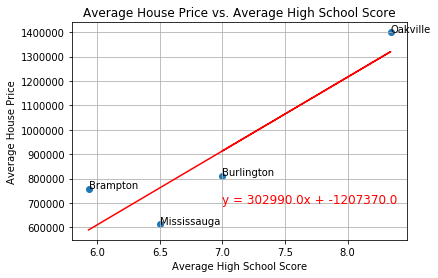

In [47]:
#High School - House Price vs. School Score

# Add the linear regression equation and line to plot
high_school_score = price_schools_commute_df['mean_high']
house_price = price_schools_commute_df['House Mean']

#add regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(high_school_score, house_price)
regress_values = high_school_score * slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,0))

#plot data as scatter
plt.scatter(high_school_score, house_price)

#plot regression line with formula
plt.plot(high_school_score,regress_values,"r-")
plt.annotate(line_eq,(7,700000),fontsize=12,color="red")

#Labels and titles
plt.title('Average House Price vs. Average High School Score')
plt.xlabel('Average High School Score')
plt.ylabel('Average House Price')
#plt.xlim(6,8)
# plt.ylim(-100000,1500000)
for i, txt in enumerate(price_schools_commute_df['City']):
    plt.annotate(txt, (high_school_score[i], house_price[i]))

print(f"The r-squared is: {rvalue}")

plt.grid(True)

# Save the figure
plt.savefig("House Price vs. High School Score.png")
plt.show()

The r-squared is: 0.859134644294327


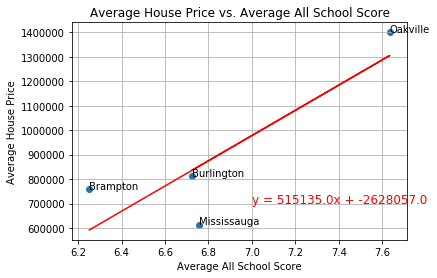

In [48]:
#Combined Elementary and High School - House Price vs. School Score

# Add the linear regression equation and line to plot
all_school_score = price_schools_commute_df['Weighted Mean All Schools']
house_price = price_schools_commute_df['House Mean']

#add regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(all_school_score, house_price)
regress_values = all_school_score * slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,0))

#plot data as scatter
plt.scatter(all_school_score, house_price)

#plot regression line with formula
plt.plot(all_school_score,regress_values,"r-")
plt.annotate(line_eq,(7,700000),fontsize=12,color="red")

#Labels and titles
plt.title('Average House Price vs. Average All School Score')
plt.xlabel('Average All School Score')
plt.ylabel('Average House Price')
#plt.xlim(6,8)
# plt.ylim(-100000,1500000)
for i, txt in enumerate(price_schools_commute_df['City']):
    plt.annotate(txt, (all_school_score[i], house_price[i]))

print(f"The r-squared is: {rvalue}")

plt.grid(True)

# Save the figure
plt.savefig("House Price vs. All School Score.png")
plt.show()

The r-squared is: 0.0799822863128268


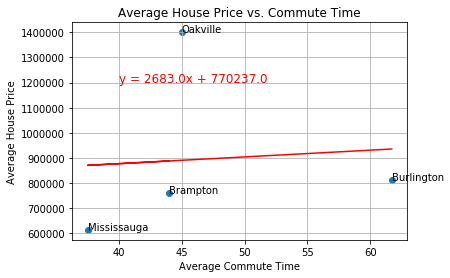

In [49]:
#Combined House Price vs. Commute Time

# Add the linear regression equation and line to plot
commute_time = price_schools_commute_df['Average Time (min)']
house_price = price_schools_commute_df['House Mean']

#add regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(commute_time, house_price)
regress_values = commute_time * slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,0))

#plot data as scatter
plt.scatter(commute_time, house_price)

#plot regression line with formula
plt.plot(commute_time,regress_values,"r-")
plt.annotate(line_eq,(40, 1200000),fontsize=12,color="red")

#Labels and titles
plt.title('Average House Price vs. Commute Time')
plt.xlabel('Average Commute Time')
plt.ylabel('Average House Price')
#plt.xlim(6,8)
# plt.ylim(-100000,1500000)
for i, txt in enumerate(price_schools_commute_df['City']):
    plt.annotate(txt, (commute_time[i], house_price[i]))

print(f"The r-squared is: {rvalue}")

plt.grid(True)

# Save the figure
plt.savefig("House Price vs. Commute Time.png")
plt.show()

In [50]:
locations = price_schools_commute_df[["Lat", "Long"]]
house_price = price_schools_commute_df["House Mean"]

# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [51]:


# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=house_price, 
                                 dissipating=False, max_intensity=1200000,
                                 point_radius=0.08)

city_highlights_df = price_schools_commute_df[['City', 'House Mean', 'mean_elem', 'mean_high']]

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Average House Price</dt><dd>{House Mean}</dd>
<dt>Average Elementary School Score</dt><dd>{mean_elem}</dd>
<dt>Average High School Score</dt><dd>{mean_high}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
city_info = [info_box_template.format(**row) for index, row in city_highlights_df.iterrows()]
locations = price_schools_commute_df[["Lat", "Long"]]

markers = gmaps.marker_layer(locations, info_box_content = city_info)
# Add layer
fig.add_layer(heat_layer)
fig.add_layer(markers)

# Display figure
fig
embed_minimal_html('export.html', views=[fig])
fig

Figure(layout=FigureLayout(height='420px'))